# redshift: z = 0.024

In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from matplotlib import gridspec
from NFW_Z import NFW_Z

Remember: 500 solar masses is the mass per particle

In [2]:
bin_size = 0.02 # tis in kpc
starting_radius = 0.02 # tis in kpc

In [3]:
전data300_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0300.txt")

In [4]:
dx300_noRT = 전data300_noRT[:,4] / 1000 # converting pc to kpc
dy300_noRT = 전data300_noRT[:,5] / 1000 # converting pc to kpc
dz300_noRT = 전data300_noRT[:,6] / 1000 # converting pc to kpc
r300_noRT = np.sqrt(dx300_noRT**2 + dy300_noRT**2 + dz300_noRT**2) # max closest to 9.76 kpc
rad_array300_noRT = np.arange(starting_radius, 9.76, bin_size) # unit: kpc

density_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
i = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3)
    density_profile300_noRT[i] = how_many_particles / shell_volume * 500
    i += 1

In [5]:
mass_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
h = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile300_noRT[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [6]:
# the mass equals to the mass of the last data point that Jeon collected.

halo6 = NFW_Z(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s(0.024)
c_vir6 = halo6.c_vir(0.024)
print('r_s =', r_s6)
print('c_vir =', c_vir6)

r_s = 0.7733865908950253
c_vir = 18.77600404199019


In [7]:
# the mass is made up by Dr Besla to estimate m_vir

halo6_1 = NFW_Z(1.72e8) # NFW using M_200 / 0.87
r_s6_1 = halo6_1.r_s(0.024)
c_vir6_1 = halo6_1.c_vir(0.024)
print('r_s =', r_s6_1)
print('c_vir =', c_vir6_1)

r_s = 0.7557282912123585
c_vir = 18.855827255165977


In [8]:
'''this is to set in stone some of the variables we'll use later'''

# this finds density that best corresponds to the critical density
rho_crit = halo6.rho_crit(0.024) 
deviation_from_rho_crit = abs(density_profile300_noRT - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array300_noRT[index][0]

# this defines the NFW profile
density_profile6 = halo6.rho(0.024, rad_array300_noRT)
density_profile6_1 = halo6_1.rho(0.024, rad_array300_noRT)

## plotting the AVERAGE density profile at this redshift (unnormalized)

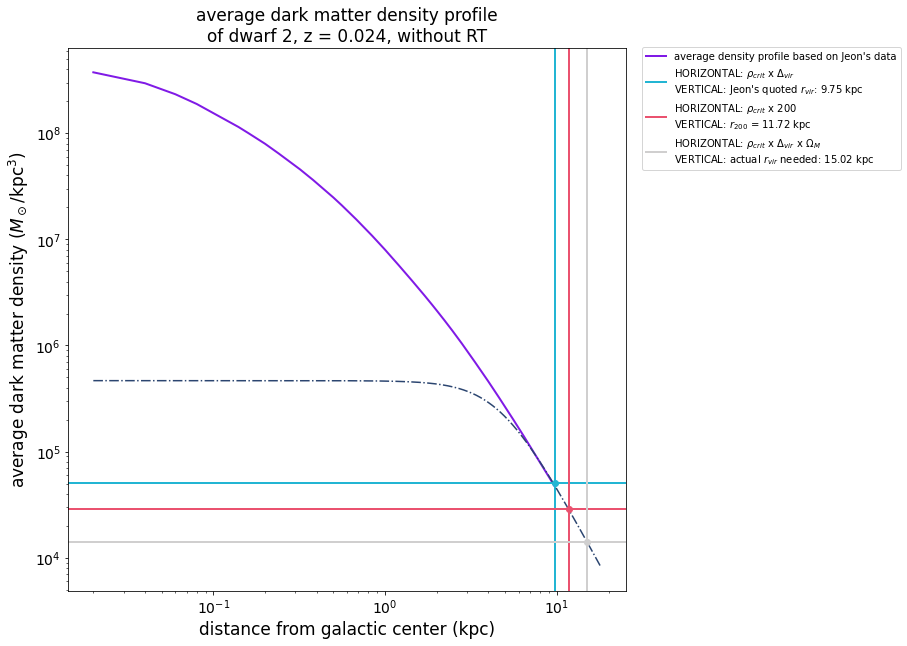

In [9]:
'''1. PLOT THE DENSITY PROFILE AND LINES BASED ON JEON'S DATA'''
fig, ax = plt.subplots(figsize=[10, 10])
plt.plot(rad_array300_noRT, density_profile300_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2, \
         label="average density profile based on Jeon's data")

plt.axhline(rho_crit * halo6.delta_vir(0.024), color='#23B5D3', linewidth=2, \
           label="HORIZONTAL: $ρ_{crit}$ x $Δ_{vir}$" + \
            "\nVERTICAL: Jeon's quoted $r_{vir}$: " + str(round(9.752054e+03 * 0.001, 2)) + ' kpc') # CYAN
plt.axvline(9.752054e+03 * 0.001, color='#23B5D3', linewidth=2) # CYAN

'''2. PLOT THE APPROXIMATION IN ORDER TO EXTEND THE DENSITY PROFILE PLOTS FURTHER,
UNTIL IT MEETS ρ_crit x Δ_vir x Omega_M. THE RADIUS WHERE THE MEETING HAPPENS
IS GOING TO BE CALLED rad_rdo'''
extended_array = np.arange(starting_radius, 18, bin_size)
extended_density_prof = 10**7.69/(extended_array**3+105)
plt.plot(extended_array, extended_density_prof, color='#2B4570', linestyle='-.')

'''3. PLOT THE DENSITY AND CORRESPONDING RADIUS THAT'S CLOSEST
TO 200 TIMES THE CRITICAL DENSITY (rho_crit)'''
density200 = rho_crit * 200
deviate = abs(extended_density_prof - density200)
ind = np.where(deviate == min(deviate))
rad200 = extended_array[ind][0]
plt.axhline(density200, color='#EA526F', linewidth=2, \
           label="HORIZONTAL: $ρ_{crit}$ x 200" + "\nVERTICAL: $r_{200}$ = " + str(round(rad200, 2)) + " kpc") # RED
plt.axvline(rad200, color='#EA526F', linewidth=2) # RED

'''4. FIND AND THEN PLOT rad_RDO'''
rho_delta_omega = rho_crit * halo6.delta_vir(0.024) * halo6.OmegaM_Z(0.024)
difference = abs(extended_density_prof - rho_delta_omega)
where = np.where(difference == min(difference))
rad_rdo = extended_array[where][0]
plt.axhline(rho_delta_omega, color='#D0CFCF', linewidth=2, \
           label="HORIZONTAL: $ρ_{crit}$ x $Δ_{vir}$ x $\Omega_{M}$" + \
           '\nVERTICAL: actual $r_{vir}$ needed: ' + str(rad_rdo) + ' kpc') # GREY
plt.axvline(rad_rdo, color='#D0CFCF', linewidth=2) # GREY

'''5. PLOT ALL THE POINTS OF INTERSECTION'''
plt.plot(9.752054e+03 * 0.001, rho_crit * halo6.delta_vir(0.024), 'o', color='#23B5D3') # CYAN
plt.plot(rad200, density200, 'o', color='#EA526F') # RED
plt.plot(rad_rdo, rho_delta_omega, 'o', color='#D0CFCF') # GREY

'''6. THESE ARE FOR THE LEGENDS AND THE REST'''
plt.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('average dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('average dark matter density profile\nof dwarf 2, z = 0.024, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

'''LO AND BEHOLD!'''
plt.show()

# applying the new virial radius: R_vir = 16.7 kpc

In [10]:
new_Rvir = 15.02

# generating a new virial mass from the new virial radius
new_Mvir = halo6.M_vir(15.02, 0.024)
print('M_vir =', new_Mvir)

M_vir = 201420852.87635607


### plotting the new virial radius and virial mass

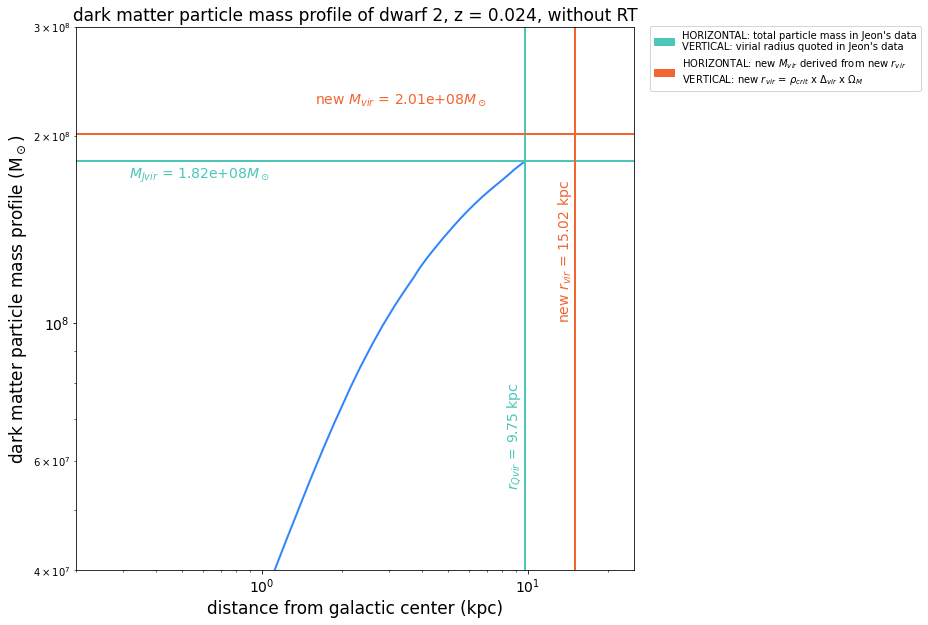

In [11]:
plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(rad_array300_noRT, mass_profile300_noRT, color='#3185FC', linewidth=2)

# horizontal & vertical lines representing M_vir and r_vir from Jeon's data
plt.axvline(9.752054e+03 * 0.001, color='#4BC6B9', linewidth=2)
plt.axhline(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1], color='#4BC6B9', linewidth=2)

# horizontal & vertical lines representing the newly found values of M_vir and r_vir
plt.axvline(new_Rvir, color='#F26430', linewidth=2)
plt.axhline(new_Mvir, color='#F26430', linewidth=2)

# separate legends
legend1 = mpatches.Patch(color='#4BC6B9', label="HORIZONTAL: total particle mass in Jeon's data" + \
                         "\nVERTICAL: virial radius quoted in Jeon's data")
legend2 = mpatches.Patch(color='#F26430', label="HORIZONTAL: new $M_{vir}$ derived from new $r_{vir}$" + \
                        "\nVERTICAL: new $r_{vir}$ = $ρ_{crit}$ x $Δ_{vir}$ x $\Omega_{M}$")

# the rest of the plot
plt.legend(handles=[legend1, legend2], bbox_to_anchor=(1.02, 1.01), loc='upper left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**-0.7, 10**1.4)
plt.ylim(4e7, 3e8)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 2, z = 0.024, without RT', loc='center', fontsize=17)

# horizontal annotations
plt.text(10**-0.5, 10**8.233, '''$M_{Jvir}$ = ''' + str(format(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#4BC6B9')
plt.text(10**0.2, 10**8.354, '''new $M_{vir}$ = ''' + str(format(new_Mvir, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#F26430')

# vertical annotations
plt.text(10**0.914, 10**7.741, '''$r_{Qvir}$ = ''' + str(round(9.752054e+03 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#4BC6B9')
plt.text(10**1.106, 10**8.009, '''new $r_{vir}$ = ''' + str(round(new_Rvir, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F26430')

# lo and behold!
plt.show()

### comparing the new mass to previous NFW fits

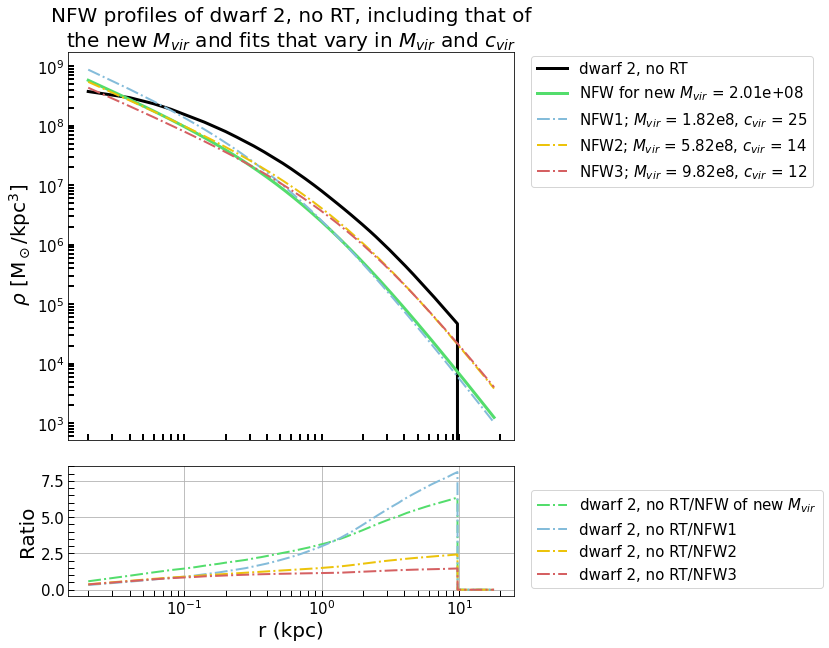

In [17]:
# extend the density profile array so it's as long as the extended array
how_much_is_extended = np.size(extended_array) - np.size(density_profile300_noRT)
density_profile300_noRT = np.concatenate([density_profile300_noRT, np.zeros(how_much_is_extended)])

# taking in the values
NFW_for_new_Mvir = NFW_Z(new_Mvir)
NFW_1 = NFW_Z(1.82e8) 
NFW_2 = NFW_Z(5.82e8)
NFW_3 = NFW_Z(9.82e8) 

# plotting everything
fig = plt.figure(figsize=(8, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) # row, columns, widths

ax0 = plt.subplot(gs[0]) # top plot
ax1 = plt.subplot(gs[1]) # bottom plot 

fig.subplots_adjust(hspace=0.1)  

ax0.loglog(extended_array, density_profile300_noRT, 'black', lw=3, label="dwarf 2, no RT")
ax0.loglog(extended_array, NFW_for_new_Mvir.rho(0.024, extended_array), '#53DD6C', lw=3, \
           label="NFW for new $M_{vir}$ = " + str(format(new_Mvir, '.2e')))
ax0.loglog(extended_array, NFW_1.rho(0.024, extended_array, c = 25), '#84BCDA', lw=2, linestyle='-.', \
          label="NFW1; $M_{vir}$ = 1.82e8, $c_{vir}$ = 25")
ax0.loglog(extended_array, NFW_2.rho(0.024, extended_array, c = 14), '#ECC30B', lw=2, linestyle='-.', \
          label="NFW2; $M_{vir}$ = 5.82e8, $c_{vir}$ = 14")
ax0.loglog(extended_array, NFW_2.rho(0.024, extended_array, c = 12), '#D56062', lw=2, linestyle='-.', \
          label="NFW3; $M_{vir}$ = 9.82e8, $c_{vir}$ = 12")

ax0.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')

ax1.plot(extended_array, density_profile300_noRT / NFW_for_new_Mvir.rho(0.130, extended_array), \
         '#53DD6C', linestyle='-.', lw=2, label="dwarf 2, no RT/NFW of new $M_{vir}$")
ax1.plot(extended_array, density_profile300_noRT / NFW_1.rho(0.024, extended_array, c = 30), \
         '#84BCDA', linestyle='-.', lw=2, label="dwarf 2, no RT/NFW1")
ax1.plot(extended_array, density_profile300_noRT / NFW_2.rho(0.024, extended_array, c = 21), \
         '#ECC30B', linestyle='-.', lw=2, label="dwarf 2, no RT/NFW2")
ax1.plot(extended_array, density_profile300_noRT / NFW_3.rho(0.024, extended_array, c = 19), \
         '#D56062', linestyle='-.', lw=2, label="dwarf 2, no RT/NFW3")

ax1.legend(bbox_to_anchor=(1.02, 0), loc='lower left')
    
ax0.minorticks_on()

ax0.set_title('NFW profiles of dwarf 2, no RT, including that of\nthe new $M_{vir}$ and fits that vary in $M_{vir}$ and $c_{vir}$', \
              fontsize=20)
ax0.set_xticklabels([]) # ignore the x label
ax0.set_ylabel(r' $\rho$ [M$_\odot$/kpc$^3$] ', fontsize=20)
ax0.tick_params(axis='both', which='both', direction='in',length=6, width=2)

plt.xscale('log')

ax1.set_ylabel('Ratio',fontsize=20)
ax1.set_xlabel('r (kpc)', fontsize=20)

ax1.grid()
ax1.minorticks_on()
ax1.tick_params(axis='both', which='both', direction='in',length=6, width=1)

plt.rcParams.update({'font.size': 15})